In [4]:
from bert_score import score

# Example captions
references = ["A dog is running in the park"]
candidates = ["A brown canine runs through the field"]

# Compute BERTScore
P, R, F1 = score(candidates, references, lang="en", verbose=True)

print(f"Precision: {P.mean():.3f}")
print(f"Recall: {R.mean():.3f}")
print(f"F1: {F1.mean():.3f}")

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 1/1 [00:00<00:00, 36.73it/s]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 294.34it/s]

done in 0.04 seconds, 24.63 sentences/sec
Precision: 0.923
Recall: 0.939
F1: 0.931


### Bert score between cuaxu and default

In [13]:
from bert_score import score

references = ['Three stuffed animals are sitting on a bed.', 'A black fluffy cat sitting on top of a computer keyboard.']

cuaxu_candidates = ['Two teddy bears are seated with the other stuffed animals.', 'Gray and white cat sitting next to open laptop.']

default_candidates = ['This is a picture of four stuffed animals.', ' A cat looking up at the television that has something interesting on it.']

cuaxu_score = score(cuaxu_candidates, references, lang="en" )
default_score = score(default_candidates, references, lang="en")

print(f'cuaxu f1: {cuaxu_score[2].mean():00f} +- {1.96 * cuaxu_score[2].std()}')
print(f'default f1: {default_score[2].mean()} +- {1.96 * default_score[2].std()}')



/home/afahim2/miniconda3/envs/clip-project-310/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and i

cuaxu f1: 0.919555 +- 0.024467941373586655
default f1: 0.8978180289268494 +- 0.026237402111291885


In [2]:
import torch
import sys
import os
# # add parent directory to path
# sys.path.append(os.path.dirname(os.path.abspath(__file__)))
# # add sibling directory to path 
# sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath(__file__))))# def 

sys.path.append('/home/afahim2/tmp/clip-project/clipverse')
# sys.path.append('/home/afahim2/tmp/babylm/baby_lm_2024/git-2024')


from clips.clip_assembler import ClipAssembler
from src.evaluator import Evaluator
from dataset_processors.mscoco_processor import MSCOCOProcessor

from src.prepare_config import prepare_config
from clips.hf_clip import HFClipOutput, HFClip
import torch.nn.functional as F

/home/afahim2/miniconda3/envs/clip-project-310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import importlib
importlib.reload(sys.modules['dataset_processors'].mscoco_processor)
importlib.reload(sys.modules['src'].evaluator)
importlib.reload(sys.modules['src'].prepare_config)


<module 'src.prepare_config' from '/home/afahim2/tmp/clip-project/clipverse/src/prepare_config.py'>

In [4]:
cuda_device = 'cuda:0'
ROOT = '/home/afahim2/tmp/clip-project/clipverse'

In [5]:
checkpoint_paths = {
    'clip':  f'{ROOT}/checkpoints/T0.01_Lit_44_finetune_I1C2E1E2_128_val_as_val_512_mscoco_VIT_pretrained_FINAL10.pt',
    'cua':  f'{ROOT}/checkpoints/T0.01_Lituniform_align_44_finetune_I1C2E1E2_128_val_as_val_512_mscoco_VIT_pretrained_FINAL10.pt',
    'cuaxu':  f'{ROOT}/checkpoints/T0.01_Lituniform_align_xuniform_44_finetune_I1C2E1E2_128_val_as_val_512_mscoco_VIT_pretrained_FINAL10.pt'
}

### Load CLIP model

In [6]:

device = torch.device(cuda_device if torch.cuda.is_available() else 'cpu')

prepare_config(clip_projection_dim=128, cuda_device=cuda_device, seed=2)

checkpoint = torch.load(checkpoint_paths['cuaxu'], map_location=device)
default_checkpoint = torch.load(checkpoint_paths['clip'], map_location=device)

model_state_dict = checkpoint['model_state_dict']

cuaxu_clip_model = ClipAssembler().clip_model.to(device)

cuaxu_clip_model.load_state_dict(model_state_dict)


default_clip_model = ClipAssembler().clip_model.to(device)

default_clip_model.load_state_dict(default_checkpoint['model_state_dict'])

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: abrar_fahim (team-abrar). Use `wandb login --relogin` to force relogin


/home/afahim2/miniconda3/envs/clip-project-310/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(



--- ENCODER 1 = IMAGE --- 


 --- Initializing CLIP Image Encoder from pretrained model ---


 --- Changing projection layer size of CLIP Image Encoder: VIT  to 128--- 


 --- Unfreezing backbone weights of CLIP Image Encoder: VIT  --- 


--- ENCODER 2 = TEXT --- 


 --- Initializing Text Encoder with CLIP tokenizer from pretrained model ---


 --- Changing projection layer size of Text Encoder with CLIP tokenizer to 128  --- 


 --- Unfreezing backbone weights of Text Encoder with CLIP tokenizer --- 

CLIP device  cuda
check point path for CLIP model  checkpoints/T0.01_Lit_2_finetune_I1C2E1E2_128_val_as_val_5000_mscoco_VIT_pretrained_POST_PAPER.pt
CLIP model not loaded from checkpoint

--- HF CLIP MODEL ---

selected clip model  FINETUNED_TEMP
temperature (T):  0.01

--- ENCODER 1 = IMAGE --- 


 --- Initializing CLIP Image Encoder from pretrained model ---


 --- Changing projection layer size of CLIP Image Encoder: VIT  to 128--- 


 --- Unfreezing backbone weights of CLIP Image En

<All keys matched successfully>

### Load Dataset

In [7]:
val_batch_cache_file = f'{ROOT}/datasets/mscoco/val_batch_cache_mscoco_full_5k.pt'

mscoco_val_imgs: torch.Tensor = None
mscoco_val_captions: list[str] = None

(mscoco_val_imgs, mscoco_val_captions) = torch.load(val_batch_cache_file)

In [8]:
import torchvision.datasets as dset


mscoco_detection_dataset = dset.CocoDetection(
            root = f'{ROOT}/datasets/mscoco2/val2017',
            # root = './datasets/mscoco/val2014',
            # root = '/Volumes/SanDisk Extreme SSD Media/clipverse/mscoco copy/val2014',
            annFile= f'{ROOT}/datasets/mscoco2/annotations/instances_val2017.json',
            # annFile= './datasets/mscoco/annotations/captions_val2014.json',
            transform=ClipAssembler().image_preprocessor,
        )




--- ENCODER 1 = IMAGE --- 


 --- Initializing CLIP Image Encoder from pretrained model ---


 --- Changing projection layer size of CLIP Image Encoder: VIT  to 128--- 


 --- Unfreezing backbone weights of CLIP Image Encoder: VIT  --- 


--- ENCODER 2 = TEXT --- 


 --- Initializing Text Encoder with CLIP tokenizer from pretrained model ---


 --- Changing projection layer size of Text Encoder with CLIP tokenizer to 128  --- 


 --- Unfreezing backbone weights of Text Encoder with CLIP tokenizer --- 

CLIP device  cuda
check point path for CLIP model  checkpoints/T0.01_Lit_2_finetune_I1C2E1E2_128_val_as_val_5000_mscoco_VIT_pretrained_POST_PAPER.pt
CLIP model not loaded from checkpoint

--- HF CLIP MODEL ---

selected clip model  FINETUNED_TEMP
temperature (T):  0.01
loading annotations into memory...
Done (t=0.87s)
creating index...
index created!


In [9]:
mscoco_categories = mscoco_detection_dataset.coco.dataset['categories']

mscoco_categories

[{'supercategory': 'person', 'id': 1, 'name': 'person'},
 {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'vehicle', 'id': 3, 'name': 'car'},
 {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'},
 {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'},
 {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'},
 {'supercategory': 'vehicle', 'id': 7, 'name': 'train'},
 {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'},
 {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'},
 {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'},
 {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'},
 {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'},
 {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'},
 {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'},
 {'supercategory': 'animal', 'id': 16, 'name': 'bird'},
 {'supercategory': 'animal', 'id': 17, 'name': 'cat'},
 {'supercategory': 'animal', 'id': 18, 'name': 'dog'},

In [10]:
def get_category_name(cat_id) -> str:
    for cat in mscoco_categories:
        if cat['id'] == cat_id:
            return cat['name']

    return None

In [125]:
mscoco_detection_dataset[0][1]

[{'segmentation': [[240.86,
    211.31,
    240.16,
    197.19,
    236.98,
    192.26,
    237.34,
    187.67,
    245.8,
    188.02,
    243.33,
    176.02,
    250.39,
    186.96,
    251.8,
    166.85,
    255.33,
    142.51,
    253.21,
    190.49,
    261.68,
    183.08,
    258.86,
    191.2,
    260.98,
    206.37,
    254.63,
    199.66,
    252.51,
    201.78,
    251.8,
    212.01]],
  'area': 531.8071000000001,
  'iscrowd': 0,
  'image_id': 139,
  'bbox': [236.98, 142.51, 24.7, 69.5],
  'category_id': 64,
  'id': 26547},
 {'segmentation': [[9.66,
    167.76,
    156.35,
    173.04,
    153.71,
    256.48,
    82.56,
    262.63,
    7.03,
    260.87]],
  'area': 13244.657700000002,
  'iscrowd': 0,
  'image_id': 139,
  'bbox': [7.03, 167.76, 149.32, 94.87],
  'category_id': 72,
  'id': 34646},
 {'segmentation': [[563.33,
    209.19,
    637.69,
    209.19,
    638.56,
    287.92,
    557.21,
    280.04]],
  'area': 5833.117949999999,
  'iscrowd': 0,
  'image_id': 139,
  'bbox

In [126]:
[t['category_id'] for t in mscoco_detection_dataset[0][1]]

[64, 72, 72, 62, 62, 62, 62, 1, 1, 78, 82, 84, 84, 85, 86, 86, 62, 86, 86, 67]

In [11]:
mscoco_detection_val_dataloader = torch.utils.data.DataLoader(mscoco_detection_dataset, batch_size=1, generator=torch.Generator().manual_seed(2), shuffle=False)

In [12]:
from tqdm import tqdm

for batch in tqdm(mscoco_detection_val_dataloader):
    img, target = batch

    if len(target) >= 1 and target[0]['image_id'] == 139:

        # get all category_ids from target
        category_ids = [t['category_id'] for t in target]

        # unique
        category_ids = torch.unique(torch.tensor(category_ids))

        # get all category names from category_ids
        category_names = [get_category_name(cat_id) for cat_id in category_ids]

        print('category_names ', category_names)

        print('category_ids ', category_ids)

        print('target ', target)
        print(f'image id: {target[0]["image_id"]}')
        print(f'category id: {target[0]["category_id"]}')
        break

    # print(target)
    


    

  0%|          | 0/5000 [00:00<?, ?it/s]

category_names  ['person', 'chair', 'potted plant', 'dining table', 'tv', 'microwave', 'refrigerator', 'book', 'clock', 'vase']
category_ids  tensor([ 1, 62, 64, 67, 72, 78, 82, 84, 85, 86])
target  

  0%|          | 0/5000 [00:00<?, ?it/s]

[{'segmentation': [[tensor([240.8600], dtype=torch.float64), tensor([211.3100], dtype=torch.float64), tensor([240.1600], dtype=torch.float64), tensor([197.1900], dtype=torch.float64), tensor([236.9800], dtype=torch.float64), tensor([192.2600], dtype=torch.float64), tensor([237.3400], dtype=torch.float64), tensor([187.6700], dtype=torch.float64), tensor([245.8000], dtype=torch.float64), tensor([188.0200], dtype=torch.float64), tensor([243.3300], dtype=torch.float64), tensor([176.0200], dtype=torch.float64), tensor([250.3900], dtype=torch.float64), tensor([186.9600], dtype=torch.float64), tensor([251.8000], dtype=torch.float64), tensor([166.8500], dtype=torch.float64), tensor([255.3300], dtype=torch.float64), tensor([142.5100], dtype=torch.float64), tensor([253.2100], dtype=torch.float64), tensor([190.4900], dtype=torch.float64), tensor([261.6800], dtype=torch.float64), tensor([183.0800], dtype=torch.float64), tensor([258.8600], dtype=torch.float64), tensor([191.2000], dtype=torch.float6

### Get outputs from CLIP model

In [13]:
def get_retrieval_stats(clip_model: HFClip):
    
    with torch.no_grad():

        clip_model.eval()

        model_outputs: HFClipOutput = clip_model(mscoco_val_imgs, mscoco_val_captions, output_loss=False, return_all=True, output_hidden_states=False, output_intra_modality_loss=True)

        val_logits_per_image = model_outputs.logits_per_image  # shape: ([64, 64])




        # softmax on logits_per_image
        val_image_class_probs = F.softmax(val_logits_per_image, dim=-1) # shape: ([64, 64])

        topk = [1, 3, 5, 10]
        correct = {k: 0 for k in topk}
        

        correct_elements: dict[int: list[int]] = {k: [] for k in topk}

        incorrect: dict[int: list[int]] = {k: [] for k in topk}

        print('correct_elements ', correct_elements)



        ranks = val_logits_per_image.topk(max(topk), 1)[1].T

        for k in topk:
            correct[k] += torch.sum(torch.any(ranks[:k] == torch.arange(ranks.shape[1], device=ranks.device).unsqueeze(0), dim = 0)).item()

            correct_elements[k] = torch.where(torch.any(ranks[:k] == torch.arange(ranks.shape[1], device=ranks.device).unsqueeze(0), dim = 0))[0].tolist()

            incorrect[k] = torch.where(torch.any(ranks[:k] == torch.arange(ranks.shape[1], device=ranks.device).unsqueeze(0), dim = 0) == False)[0].tolist()


        # calculate accuracy
        # get indices of max values
        val_image_class_preds = val_image_class_probs.argmax(dim=-1) # shape: ([64])


        val_image_class_labels = torch.arange(val_image_class_probs.shape[0], device=val_image_class_probs.device) # shape: ([64])


        # calculate accuracy
        val_image_classification_accuracy = (val_image_class_preds == val_image_class_labels).float().mean()

        print('val image class acc ', {k: round(correct[k] / val_image_class_labels.shape[0], 3) for k in topk})

        print('val_image_classification_accuracy ', val_image_classification_accuracy.item())

        text_retrieval_accuracies = {
            k: correct[k] / val_image_class_labels.shape[0] for k in topk
        }

        print('text_retrieval_accuracies ', text_retrieval_accuracies)

    return {
        'val_logits_per_image': val_logits_per_image,
        'val_image_classification_accuracy': val_image_classification_accuracy,
        'text_retrieval_accuracies': text_retrieval_accuracies,
        'correct': correct,
        'correct_elements': correct_elements,
        'incorrect': incorrect,
        'val_image_class_labels': val_image_class_labels,
        'val_image_class_preds': val_image_class_preds
    }
    
    


In [14]:
cuaxu_retreival_stats = get_retrieval_stats(cuaxu_clip_model)
default_retreival_stats = get_retrieval_stats(default_clip_model)


correct_elements  {1: [], 3: [], 5: [], 10: []}
val image class acc  {1: 0.263, 3: 0.456, 5: 0.549, 10: 0.682}
val_image_classification_accuracy  0.2627972662448883
text_retrieval_accuracies  {1: 0.26279725916968966, 3: 0.45566303909713823, 5: 0.5489721886336155, 10: 0.6815800080612656}
correct_elements  {1: [], 3: [], 5: [], 10: []}
val image class acc  {1: 0.275, 3: 0.466, 5: 0.565, 10: 0.702}
val_image_classification_accuracy  0.27488917112350464
text_retrieval_accuracies  {1: 0.27488915759774285, 3: 0.46594115276098347, 5: 0.5652962515114873, 10: 0.7015316404675535}


In [15]:
# print(f'correct_elements {correct_elements}')
# print(f'incorrect {incorrect}')

correct_elements = cuaxu_retreival_stats['correct_elements']
incorrect = cuaxu_retreival_stats['incorrect']

print(f'len correct_elements 1 {len(correct_elements[1])}')
print(f'len incorrect 1 {len(incorrect[1])}')
print(f"sum {len(correct_elements[1]) + len(incorrect[1])}")

print(f'len correct_elements 3 {len(correct_elements[3])}')
print(f'len incorrect 3 {len(incorrect[3])}')
print(f"sum {len(correct_elements[3]) + len(incorrect[3])}")

print(f'len correct_elements 5 {len(correct_elements[5])}')
print(f'len incorrect 5 {len(incorrect[5])}')
print(f"sum {len(correct_elements[5]) + len(incorrect[5])}")


len correct_elements 1 1304
len incorrect 1 3658
sum 4962
len correct_elements 3 2261
len incorrect 3 2701
sum 4962
len correct_elements 5 2724
len incorrect 5 2238
sum 4962


### Calculate statistics from *all* mistakes

In [14]:
cuaxu_retreival_stats['incorrect'].keys()

dict_keys([1, 3, 5, 10])

In [16]:
cauxu_val_image_class_preds = cuaxu_retreival_stats['val_image_class_preds']
default_val_image_class_preds = default_retreival_stats['val_image_class_preds']

In [22]:
len(cuaxu_retreival_stats['incorrect'][1])

3658

In [20]:
cauxu_val_image_class_preds

tensor([4234,    1, 4223,  ...,  903, 4960,  438], device='cuda:0')

In [14]:
def get_categories_in_image_id(image_id: int) -> list[str]:
    category_ids = [t['category_id'] for t in mscoco_detection_dataset[image_id][1]]
    category_ids = torch.unique(torch.tensor(category_ids))
    category_names = [get_category_name(cat_id) for cat_id in category_ids]
    return category_names



### BERTScore of cuaxu and default captions for mistakes

In [15]:
cuaxu_gt_captions = [mscoco_val_captions[i] for i in cuaxu_retreival_stats['incorrect'][1]]

cuaxu_pred_captions = [mscoco_val_captions[cauxu_val_image_class_preds[i]] for i in cuaxu_retreival_stats['incorrect'][1]]

default_gt_captions = [mscoco_val_captions[i] for i in default_retreival_stats['incorrect'][1]]
default_pred_captions = [mscoco_val_captions[default_val_image_class_preds[i]] for i in default_retreival_stats['incorrect'][1]]

In [26]:
cuaxu_retreival_stats['incorrect'][1][:15], default_retreival_stats['incorrect'][1][:15]

([0, 2, 3, 4, 5, 6, 8, 10, 13, 15, 16, 17, 18, 19, 20],
 [0, 2, 3, 4, 5, 6, 8, 10, 13, 15, 17, 18, 20, 21, 22])

In [29]:
# find the instances where cuaxu and default make the same mistakes

cuaxu_default_mistakes = set(cuaxu_retreival_stats['incorrect'][1]).intersection(set(default_retreival_stats['incorrect'][1]))

# find number of instances where the predicted captions are the same among the common mistakes

cuaxu_default_same_mistakes = [i for i in cuaxu_default_mistakes if cauxu_val_image_class_preds[i] == default_val_image_class_preds[i]]

cuaxu_default_different_mistakes = [i for i in cuaxu_default_mistakes if cauxu_val_image_class_preds[i] != default_val_image_class_preds[i]]



len(cuaxu_default_mistakes), len(cuaxu_default_same_mistakes), len(cuaxu_default_different_mistakes)

(3237, 1364, 1873)

In [ ]:
cuaxu_score = 

In [16]:
len(cuaxu_gt_captions), len(cuaxu_pred_captions), len(default_gt_captions), len(default_pred_captions)

(3658, 3658, 3598, 3598)

In [17]:
from bert_score import score

cuaxu_score = score(cuaxu_pred_captions, cuaxu_gt_captions, lang="en" )

default_score = score(default_pred_captions, default_gt_captions, lang="en")

print(f'cuaxu f1: {cuaxu_score[2].mean():01f} +- {1.96 * cuaxu_score[2].std()}')

print(f'default f1: {default_score[2].mean()} +- {1.96 * default_score[2].std()}')

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


cuaxu f1: 0.899632 +- 0.047749172896146774
default f1: 0.8978627920150757 +- 0.0479983389377594


In [36]:
from evaluate import load
import numpy as np

bertscore = load("bertscore")

cuaxu_results = bertscore.compute(predictions=cuaxu_pred_captions, references=cuaxu_gt_captions, lang="en")
default_results = bertscore.compute(predictions=default_pred_captions, references=default_gt_captions, lang="en")


print(f'cuaxu f1: {np.mean(cuaxu_results["f1"])} +- {1.96 * np.std(cuaxu_results["f1"])}')
print(f'default f1: {np.mean(default_results["f1"])} +- {1.96 * np.std(default_results["f1"])}')

/home/afahim2/miniconda3/envs/clip-project-310/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


cuaxu f1: 0.8996323191480861 +- 0.04774264392407477
default f1: 0.8978627681268329 +- 0.0479916725596449


### BERTScore between pseudo captions now

In [ ]:
### Find number

In [51]:
from evaluate import load
import numpy as np

bertscore = load("bertscore")

cuaxu_results = bertscore.compute(predictions=cuaxu_pred_captions, references=psuedo_captions[0], lang="en")
default_results = bertscore.compute(predictions=default_pred_captions, references=psuedo_captions[1], lang="en")


print(f'cuaxu f1: {np.mean(cuaxu_results["f1"])} +- {1.96 * np.std(cuaxu_results["f1"])}')
print(f'default f1: {np.mean(default_results["f1"])} +- {1.96 * np.std(default_results["f1"])}')

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


cuaxu f1: 0.8414902014442973 +- 0.029314773952852865
default f1: 0.84154089879433 +- 0.029449454381071362


In [52]:
print(f'cuaxu precision: {np.mean(cuaxu_results["precision"]):.03f} +- {1.96 * np.std(cuaxu_results["precision"]):.03f}')
print(f'default precision: {np.mean(default_results["precision"]):.03f} +- {1.96 * np.std(default_results["precision"]):.03f}')

cuaxu precision: 0.849 +- 0.034
default precision: 0.848 +- 0.035


In [43]:
mscoco_val_captions[200], get_categories_in_image_id(200)


('a little boy kneeling down while attempting to stick his hand in a bowl of water',
 ['person', 'tie', 'bowl'])

In [23]:
unnormalize_image_for_display(mscoco_detection_dataset[200][0]).save('detection.jpg')

In [24]:
unnormalize_image_for_display(mscoco_val_imgs[200]).save('test_test_image.jpg')

In [20]:
def categories_caption_overlap(categories: list[str], caption: str) -> int:
    caption = caption.lower()
    categories = [cat.lower() for cat in categories]
    return sum([1 for cat in categories if cat in caption])
    

In [42]:
caption = 'I want to eat a banana'

categories = ['banana', 'want', 'eat', 'apple']


categories_caption_overlap(categories, caption)

3

### Generate pseudo caption containing all object categories

In [48]:
from tqdm import tqdm
psuedo_captions: list[list[str]] = [[], []]

for i, stats in enumerate([cuaxu_retreival_stats, default_retreival_stats]):

    val_image_class_preds = stats['val_image_class_preds']

    for incorrect_idx in tqdm(stats['incorrect'][1]):
        caption = mscoco_val_captions[incorrect_idx]
        categories = get_categories_in_image_id(val_image_class_preds[incorrect_idx])

        pseudo_caption = f'a photo containing {" and ".join(categories)}"'

        psuedo_captions[i].append(pseudo_caption)

100%|██████████| 3598/3598 [02:14<00:00, 26.66it/s]


In [49]:
psuedo_captions

[['a photo containing person and chair and remote and book"',
  'a photo containing person and bicycle and umbrella"',
  'a photo containing person and boat and umbrella"',
  'a photo containing person and car and truck and stop sign"',
  'a photo containing laptop and mouse"',
  'a photo containing skateboard"',
  'a photo containing potted plant and toilet and sink"',
  'a photo containing chair and couch and potted plant and tv and mouse and remote"',
  'a photo containing person and spoon and cake"',
  'a photo containing cat and tv"',
  'a photo containing chair and dining table and tv and remote and book and vase"',
  'a photo containing person and bottle and bowl and oven and refrigerator"',
  'a photo containing person and dog"',
  'a photo containing person and car and train and traffic light"',
  'a photo containing person and skateboard"',
  'a photo containing person and boat and handbag and chair"',
  'a photo containing toilet and sink"',
  'a photo containing sink"',
  '

In [29]:
from tqdm import tqdm
with torch.no_grad():


    # overlaps = [0, 0] # cuaxu, default

    overlaps: list[list[str]] = [[], []]

    stats = None

    for i, stats in enumerate([cuaxu_retreival_stats, default_retreival_stats]):


        val_image_class_preds = stats['val_image_class_preds']
        for incorrect_index in tqdm(stats['incorrect'][1]):

            image = mscoco_val_imgs[incorrect_index]
            gt_caption = mscoco_val_captions[incorrect_index]
            pred_caption = mscoco_val_captions[val_image_class_preds[[incorrect_index]]]

            # categories present in this image
            image_categories = get_categories_in_image_id(incorrect_index) # ensure that image_id here  == incorrect id LATER

            overlap = categories_caption_overlap(image_categories, pred_caption)

            overlaps[i].append(overlap)

            # overlaps[i] += overlap

        # overlaps[i] = overlaps[i] / len(stats['incorrect'][1])

        









100%|██████████| 3598/3598 [01:29<00:00, 40.26it/s]


cuaxu: 0.10251503553854566 +- 0.33664347672143285
default: 0.09366314619232907 +- 0.31694567921382655
3 3


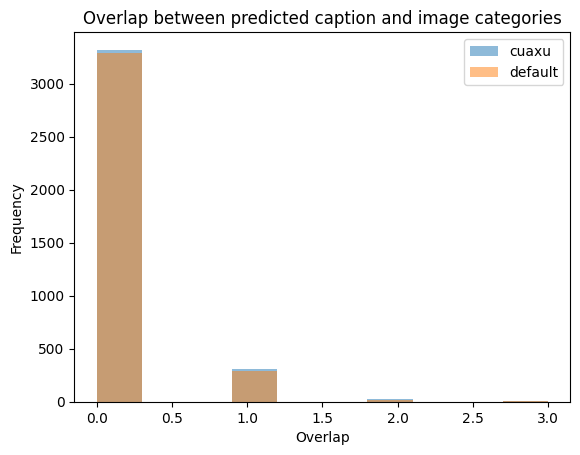

In [40]:
import numpy as np

np.mean(overlaps[0]), np.mean(overlaps[1])

np.std(overlaps[0]), np.std(overlaps[1])

print(f"cuaxu: {np.mean(overlaps[0])} +- {np.std(overlaps[0])}")
print(f"default: {np.mean(overlaps[1])} +- {np.std(overlaps[1])}")

print(np.max(overlaps[0]), np.max(overlaps[1]))

# visualize the overlap distributions

import matplotlib.pyplot as plt

plt.hist(overlaps[0], bins=10, alpha=0.5, label='cuaxu')
plt.hist(overlaps[1], bins=10, alpha=0.5, label='default')
plt.legend(loc='upper right')
plt.title('Overlap between predicted caption and image categories')
plt.xlabel('Overlap')
plt.ylabel('Frequency')
plt.show()


### Examine Mistakes

In [21]:
from PIL import Image
import numpy as np
def unnormalize_image_for_display(image: torch.Tensor) -> Image.Image:
    '''
    can do img.show() on returned output
    '''

    MEAN = np.array([123.675, 116.280, 103.530]) / 255
    STD = np.array([58.395, 57.120, 57.375]) / 255
    unnormalized_image = (image.numpy() * np.array(STD)[:, None, None]) + np.array(MEAN)[:, None, None]
    unnormalized_image = (unnormalized_image * 255).astype(np.uint8)
    unnormalized_image = np.moveaxis(unnormalized_image, 0, -1)
    img = Image.fromarray(unnormalized_image)

    return img


In [50]:
def example_of_mistake(retreival_stats, index, name):

    with torch.no_grad():

        correct_elements = retreival_stats['correct_elements']
        incorrect = retreival_stats['incorrect']
        val_image_class_preds = retreival_stats['val_image_class_preds']
        val_logits_per_image = retreival_stats['val_logits_per_image']
        print()
        print(f' --- Example Mistake for {name} ---')
        print()

        print(f'correct_elements[1][{index}] ', correct_elements[1][index])
        print(f'incorrect[1][{index}] ', incorrect[1][index])

        first_correct_image = mscoco_val_imgs[correct_elements[1][index]]
        first_correct_image_caption = mscoco_val_captions[correct_elements[1][index]]

        first_incorrect_image = mscoco_val_imgs[incorrect[1][index]]

        first_incorrect_image_caption_gt = mscoco_val_captions[incorrect[1][index]]

        first_incorrect_image_caption_pred = mscoco_val_captions[val_image_class_preds[incorrect[1][index]]]

        unnormalized_image_correct = unnormalize_image_for_display(first_correct_image)

        unnormalized_image_incorrect = unnormalize_image_for_display(first_incorrect_image)

        print(f'1.{index} correct_image_caption ', first_correct_image_caption)
        print(f'1.b similarity score: {val_logits_per_image[correct_elements[1][index], correct_elements[1][index]]}')
        print('---')
        print(f'2. {index} incorrect_image_caption_gt ', first_incorrect_image_caption_gt)
        print(f'2.b similarity score: {val_logits_per_image[incorrect[1][index], incorrect[1][index]]}')
        print('---')
        print(f'3. {index} incorrect_image_caption_pred ', first_incorrect_image_caption_pred)
        print(f'3.b similarity score: {val_logits_per_image[incorrect[1][index], val_image_class_preds[incorrect[1][index]]]}')

        unnormalized_image_correct.save(f'{name}_correct_image_{index}.png')
        unnormalized_image_incorrect.save(f'{name}_incorrect_image_{index}.png')
    

In [52]:
# Find index of example where both retrieval stats have the same number in incorrect[1]

incorrect_cuaxu = cuaxu_retreival_stats['incorrect']
incorrect_default = default_retreival_stats['incorrect']

print('incorrect_cuaxu[1] ', incorrect_cuaxu[1])
print('incorrect_default[1] ', incorrect_default[1])
    

incorrect_cuaxu[1]  [0, 2, 3, 4, 5, 6, 8, 10, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 37, 38, 39, 40, 41, 43, 45, 46, 47, 48, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 64, 66, 67, 69, 70, 71, 72, 73, 74, 75, 76, 78, 79, 80, 81, 82, 84, 85, 86, 88, 89, 91, 92, 94, 95, 96, 97, 100, 101, 102, 104, 105, 106, 107, 108, 110, 111, 114, 115, 118, 119, 120, 121, 123, 125, 127, 128, 129, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 168, 171, 174, 176, 178, 180, 182, 183, 186, 188, 190, 192, 193, 194, 195, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 212, 213, 214, 215, 218, 220, 221, 222, 223, 224, 226, 227, 228, 230, 231, 232, 233, 234, 235, 236, 239, 240, 241, 242, 243, 244, 245, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 259, 260, 261, 262, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 278, 280, 281, 282, 283,

In [53]:
example_of_mistake(cuaxu_retreival_stats, 12, 'cuaxu')
example_of_mistake(default_retreival_stats, 11, 'default')


 --- Example Mistake for cuaxu ---

correct_elements[1][12]  42
incorrect[1][12]  18
1.12 correct_image_caption  Two men shake hands at a formal dinner gathering.
1.b similarity score: 72.51534271240234
---
2. 12 incorrect_image_caption_gt  A black fluffy cat sitting on top of a computer keyboard.
2.b similarity score: 70.72613525390625
---
3. 12 incorrect_image_caption_pred  Gray and white cat sitting next to open laptop.
3.b similarity score: 73.76078033447266

 --- Example Mistake for default ---

correct_elements[1][11]  32
incorrect[1][11]  18
1.11 correct_image_caption  A large knife is sitting in front of a mug has a skull and crossbones.
1.b similarity score: 58.1522331237793
---
2. 11 incorrect_image_caption_gt  A black fluffy cat sitting on top of a computer keyboard.
2.b similarity score: 52.04783248901367
---
3. 11 incorrect_image_caption_pred  A cat looking up at the telivision that has something interesting on it. 
3.b similarity score: 57.16973114013672
